<a href="https://colab.research.google.com/github/iceangel79/MScWinf_Gruppenarbeit_Sem2/blob/main/Semesterarbeit/onlyAnalysis_Ern%C3%A4hrung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Schritt 1: Importieren der benötigten Programme und Bibliotheken**

In [ ]:
#pip install scikit-learn
#pip install kaggle

In [ ]:
# Installation der benötigten Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Installation der benötigten Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


**Schritt 2: Daten erheben & kombinieren**

**Datenvorbereitung**
- **Datenimport:** Laden der notwendigen Datensätze
- **Datenbereinigung:** Entfernung von fehlenden und unvollständigen Daten, normalisiere die Daten.
- **Feature Engineering:** Erstellung neuer Features, die für die Analyse relevant sind (z.B. Mikronährstoffe, Kalorien).

In [ ]:
# === Päckli 1a: Meals-Macros Cleaned ===
print("\n📦 Lade df_meals ...")
df_meals = pd.read_csv(
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/archive/detailed_meals_macros_CLEANED.csv"
)
df_meals.info()
display(df_meals.head(3))

# === Päckli 1b: FOOD Nutrition ===
print("\n📦 Lade df_nutrition ...")
df_nutrition = pd.read_csv(
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/archive/Food_and_Nutrition__.csv"
)
df_nutrition.info()
display(df_nutrition.head(3))

# === Päckli 2: FOOD DATA GROUPS ===
print("\n📦 Lade food_groups_combined ...")
food_data_urls = [
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP1.csv",
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP2.csv",
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP3.csv",
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP4.csv",
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP5.csv",
]
food_data_dfs = [pd.read_csv(url) for url in food_data_urls]
food_groups_combined = pd.concat(food_data_dfs, ignore_index=True)

food_groups_combined.info()
display(food_groups_combined.head(3))

# === Päckli 3: BLV-Referenzwerte ===
print("\n📦 Lade blv_nutrient_requirements ...")
blv_nutrient_requirements = pd.read_csv(
    "https://raw.githubusercontent.com/M2xAy/ffhs-datensaetze/refs/heads/main/Datasets/BLV/Nutrient_requirements_CH-2022.csv"
)
blv_nutrient_requirements.info()
display(blv_nutrient_requirements.head(3))


print("\n📊 Übersicht aller geladenen DataFrames:")

dataframes = {
    "df_meals": df_meals,
    "df_nutrition": df_nutrition,
    "food_groups_combined": food_groups_combined,
    "blv_nutrient_requirements": blv_nutrient_requirements
}

for name, df in dataframes.items():
    print(f"- {name}: {df.shape[0]} Zeilen × {df.shape[1]} Spalten")




📦 Lade df_meals ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ages                     1698 non-null   int64  
 1   Gender                   1698 non-null   object 
 2   Height                   1698 non-null   int64  
 3   Weight                   1698 non-null   int64  
 4   Activity Level           1698 non-null   object 
 5   Dietary Preference       1698 non-null   object 
 6   Daily Calorie Target     1698 non-null   int64  
 7   Protein                  1698 non-null   int64  
 8   Sugar                    1698 non-null   float64
 9   Sodium                   1698 non-null   float64
 10  Calories                 1698 non-null   int64  
 11  Carbohydrates            1698 non-null   int64  
 12  Fiber                    1698 non-null   float64
 13  Fat                      1698 non-null   int64  
 14  Bre

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,...,Dinner Protein.1,Dinner Carbohydrates.1,Dinner Fats,Snack Suggestion,Snacks Calories,Snacks Protein,Snacks Carbohydrates,Snacks Fats,Disease,Lunch Fats
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,...,60.0,250.0,60.0,Greek yogurt with fruit,150,10,20,5,Weight Gain,12.0
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,...,5.0,31.0,27.0,Apple with almond butter,180,4,30,8,"Weight Gain, Hypertension, Heart Disease",8.0
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,...,55.0,150.0,15.0,Trail mix,300,8,34,20,Weight Gain,15.0



📦 Lade df_nutrition ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain



📦 Lade food_groups_combined ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2395 non-null   int64  
 1   Unnamed: 0            2395 non-null   int64  
 2   food                  2395 non-null   object 
 3   Caloric Value         2395 non-null   int64  
 4   Fat                   2395 non-null   float64
 5   Saturated Fats        2395 non-null   float64
 6   Monounsaturated Fats  2395 non-null   float64
 7   Polyunsaturated Fats  2395 non-null   float64
 8   Carbohydrates         2395 non-null   float64
 9   Sugars                2395 non-null   float64
 10  Protein               2395 non-null   float64
 11  Dietary Fiber         2395 non-null   float64
 12  Cholesterol           2395 non-null   float64
 13  Sodium                2395 non-null   float64
 14  Water                 2395 non-null   f

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.2,0.8,0.5,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.8,3.1,2.7,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.10
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.0,0.9,3.4,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.40



📦 Lade blv_nutrient_requirements ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sex                          48 non-null     object 
 1   Age                          48 non-null     object 
 2   Energy (kcal/d)              48 non-null     object 
 3   Total Carbohydrates
(% TEI)  46 non-null     object 
 4   Fibers (g/d)                 46 non-null     object 
 5   Total fat
 (% TEI)           48 non-null     object 
 6   ALA (% TEI)                  48 non-null     float64
 7   EPA + DHA (mg/d)             42 non-null     float64
 8   DHA (mg/d)                   10 non-null     object 
 9   LA (% TEI)                   48 non-null     float64
 10  MUFA
(% TEI)                 10 non-null     object 
 11  SFA (% TEI)                  42 non-null     object 
 12  Protein
(g/kg/d)             48 non-null  

,sex,Age,Energy (kcal/d),Total Carbohydrates\n(% TEI),Fibers (g/d),Total fat\n (% TEI),ALA (% TEI),EPA + DHA (mg/d),DHA (mg/d),LA (% TEI),...,Iodine\n(�g/d),Iron\n(mg/d),Magnesium (mg/d),Manganese (mg/d),Molybdenum (�g/d),Phosphorus (mg/d),Potassium (mg/d),Selenium (�g/d),Sodium\n(g/d),Zinc\n(mg/d)
0,female,7 to 11 m,573 to 673,NaN,NaN,40,0.5,NaN,100,4.0,...,90.0,11,80,0.02 to 0.5,10.0,160.0,750,15,0.2,2.9
1,female,12 to 17 m,712 to 1096,45 to 60,10,35 to 40,0.5,NaN,100,4.0,...,90.0,7,170,0.5,15.0,250.0,800,15,1.1,4.3
2,female,18 to 23 m,712 to 1096,45 to 60,10,35 to 40,0.5,NaN,100,4.0,...,90.0,7,170,0.5,15.0,250.0,800,15,1.1,4.3



📊 Übersicht aller geladenen DataFrames:
- df_meals: 1698 Zeilen × 35 Spalten
- df_nutrition: 1698 Zeilen × 19 Spalten
- food_groups_combined: 2395 Zeilen × 37 Spalten
- blv_nutrient_requirements: 55 Zeilen × 44 Spalten


In [ ]:
# === 1. Fehlende Werte prüfen ===
missing_counts = df_meals.isnull().sum()
missing_total = df_meals.isnull().any(axis=1).sum()

print(f"\n# 🔍 Anzahl ungültiger Zeilen mit fehlenden Werten: {missing_total}")
print("\n# 🔍 Fehlende Werte pro Spalte:")
print(missing_counts[missing_counts > 0])

# === 2. Entferne Zeilen mit fehlenden Werten in relevanten Spalten ===
critical_columns = ["Breakfast Carbohydrates"]
df_meals.dropna(subset=critical_columns, inplace=True)

# Optional: Falls du *alle* NaN-Zeilen entfernen willst:
# df_meals.dropna(inplace=True)

# === 3. Duplikate entfernen ===
df_meals.drop_duplicates(subset=[col for col in df_meals.columns if col != "Disease_List"], inplace=True)

# === 4. Krankheiten vorbereiten ===
df_meals["Disease_List"] = df_meals["Disease"].fillna("").apply(lambda x: [d.strip() for d in x.split(",") if d.strip()])
df_meals["Disease_Count"] = df_meals["Disease_List"].apply(len)
df_meals["Disease_Tuple"] = df_meals["Disease_List"].apply(tuple)

# === 5. Zusammenfassung ===
print(f"\n# ✅ Anzahl verbleibender (gültiger) Datensätze: {len(df_meals)}")
print(f"# 🧹 Bereinigt: {missing_total - df_meals.isnull().any(axis=1).sum()} ungültige Zeilen entfernt")



# 🔍 Anzahl ungültiger Zeilen mit fehlenden Werten: 1

# 🔍 Fehlende Werte pro Spalte:
Breakfast Carbohydrates    1
dtype: int64

# ✅ Anzahl verbleibender (gültiger) Datensätze: 1697
# 🧹 Bereinigt: 1 ungültige Zeilen entfernt


In [ ]:
# === 1. Fehlende Werte prüfen ===
missing_counts = df_nutrition.isnull().sum()
missing_total = df_nutrition.isnull().any(axis=1).sum()

print(f"\n# 🔍 [df_nutrition] Anzahl ungültiger Zeilen mit fehlenden Werten: {missing_total}")
print(missing_counts[missing_counts > 0])

# === 2. Entferne alle Zeilen mit fehlenden Werten
df_nutrition.dropna(inplace=True)

# === 3. Duplikate entfernen
df_nutrition.drop_duplicates(inplace=True)

# === 4. Zusammenfassung
print(f"# ✅ Verbleibende Datensätze: {len(df_nutrition)}")
print(f"# 🧹 Bereinigt: {missing_total - df_nutrition.isnull().any(axis=1).sum()} ungültige Zeilen entfernt")



# 🔍 [df_nutrition] Anzahl ungültiger Zeilen mit fehlenden Werten: 0
Series([], dtype: int64)
# ✅ Verbleibende Datensätze: 1698
# 🧹 Bereinigt: 0 ungültige Zeilen entfernt


In [ ]:
# === 1. Fehlende Werte prüfen ===
missing_counts = food_groups_combined.isnull().sum()
missing_total = food_groups_combined.isnull().any(axis=1).sum()

print(f"\n# 🔍 [food_groups_combined] Anzahl ungültiger Zeilen mit fehlenden Werten: {missing_total}")
print(missing_counts[missing_counts > 0])

# === 2. Entferne alle Zeilen mit fehlenden Werten
food_groups_combined.dropna(inplace=True)

# === 3. Duplikate entfernen
food_groups_combined.drop_duplicates(inplace=True)

# === 4. Zusammenfassung
print(f"# ✅ Verbleibende Datensätze: {len(food_groups_combined)}")
print(f"# 🧹 Bereinigt: {missing_total - food_groups_combined.isnull().any(axis=1).sum()} ungültige Zeilen entfernt")



# 🔍 [food_groups_combined] Anzahl ungültiger Zeilen mit fehlenden Werten: 0
Series([], dtype: int64)
# ✅ Verbleibende Datensätze: 2395
# 🧹 Bereinigt: 0 ungültige Zeilen entfernt


In [ ]:
# === 1. Fehlende Werte prüfen ===
# 2. Nur Zeilen entfernen, die wirklich KOMPLETT leer sind
blv_nutrient_requirements.dropna(how="all", inplace=True)

# 3. Spaltennamen säubern
blv_nutrient_requirements.columns = (
    blv_nutrient_requirements.columns
    .str.replace(r'\r\n', ' ', regex=True)
    .str.replace(r'[^\w\s\(\)/%.-]', '', regex=True)
    .str.strip()
)

# 4. Jetzt NUR gezielt Sonderzeichen ersetzen (nicht sofort alles)
# Noch KEIN dropna() mehr!
print(f"✅ Zeilen nach Reparatur: {len(blv_nutrient_requirements)}")
display(blv_nutrient_requirements.head(10))

✅ Zeilen nach Reparatur: 48


,sex,Age,Energy (kcal/d),Total Carbohydrates\n(% TEI),Fibers (g/d),Total fat\n (% TEI),ALA (% TEI),EPA DHA (mg/d),DHA (mg/d),LA (% TEI),...,Iodine\n(g/d),Iron\n(mg/d),Magnesium (mg/d),Manganese (mg/d),Molybdenum (g/d),Phosphorus (mg/d),Potassium (mg/d),Selenium (g/d),Sodium\n(g/d),Zinc\n(mg/d)
0,female,7 to 11 m,573 to 673,NaN,NaN,40,0.5,NaN,100,4.0,...,90.0,11,80,0.02 to 0.5,10.0,160.0,750,15,0.2,2.9
1,female,12 to 17 m,712 to 1096,45 to 60,10,35 to 40,0.5,NaN,100,4.0,...,90.0,7,170,0.5,15.0,250.0,800,15,1.1,4.3
2,female,18 to 23 m,712 to 1096,45 to 60,10,35 to 40,0.5,NaN,100,4.0,...,90.0,7,170,0.5,15.0,250.0,800,15,1.1,4.3
3,female,2 y,712 to 1096,45 to 60,10,35 to 40,0.5,250.0,NaN,4.0,...,90.0,7,170,0.5,15.0,250.0,800,15,1.1,4.3
4,female,3 y,712 to 1096,45 to 60,10,35 to 40,0.5,250.0,NaN,4.0,...,90.0,7,170,0.5,15.0,250.0,800,15,1.1,4.3
5,female,4 y,1335 to 1500,45 to 60,14,20 to 35,0.5,250.0,NaN,4.0,...,90.0,7,230,1,20.0,440.0,1100,20,1.3,5.5
6,female,5 y,1335 to 1500,45 to 60,14,20 to 35,0.5,250.0,NaN,4.0,...,90.0,7,230,1,20.0,440.0,1100,20,1.3,5.5
7,female,6 y,1335 to 1500,45 to 60,14,20 to 35,0.5,250.0,NaN,4.0,...,120.0,7,230,1,20.0,440.0,1100,20,1.3,5.5
8,female,7 y,1591 to 1818,45 to 60,16,20 to 35,0.5,250.0,NaN,4.0,...,120.0,11,230,1.5,30.0,440.0,1800,35,1.7,7.4
9,female,8 y,1591 to 1818,45 to 60,16,20 to 35,0.5,250.0,NaN,4.0,...,120.0,11,230,1.5,30.0,440.0,1800,35,1.7,7.4


In [ ]:
# === 1.1 Feature Enginerring ===
# === 🧬 Krankheiten vorbereiten ===
df_meals["Disease_List"] = df_meals["Disease"].fillna("").apply(lambda x: [d.strip() for d in x.split(",") if d.strip()])
df_meals["Disease_Count"] = df_meals["Disease_List"].apply(len)
df_meals["Has_Chronic"] = df_meals["Disease_List"].apply(
    lambda lst: any(k in lst for k in ["Diabetes", "Hypertension", "Heart Disease", "Kidney Disease"])
)
df_meals["Multiple_Conditions"] = (df_meals["Disease_Count"] > 1).astype(int)
df_meals["Target_Chronic"] = df_meals["Has_Chronic"].astype(int)

# === 📏 Proteinbedarf nach BLV (0.8 g/kg Körpergewicht) ===
blv_protein = 0.8
df_meals["BLV_Protein_Need"] = df_meals["Weight"] * blv_protein

# === 🔹 Makroverhältnisse ===
df_meals["Protein_per_100kcal"] = df_meals["Protein"] / df_meals["Calories"] * 100
df_meals["Fat_to_Protein_Ratio"] = df_meals["Fat"] / (df_meals["Protein"] + 1e-6)
df_meals["Carb_to_Fat_Ratio"] = df_meals["Carbohydrates"] / (df_meals["Fat"] + 1e-6)
df_meals["Sugar_per_Carb"] = df_meals["Sugar"] / (df_meals["Carbohydrates"] + 1e-6)

# === 🔸 Zielüberschreitungen ===
df_meals["Calories_exceed_target"] = (df_meals["Calories"] > df_meals["Daily Calorie Target"]).astype(int)
df_meals["Sugar_excess"] = (df_meals["Sugar"] > 50).astype(int)
df_meals["Protein_deficit_ratio"] = df_meals["Protein"] / (df_meals["BLV_Protein_Need"] + 1e-6)

# === ⏰ Tagesstruktur-Features ===
df_meals["Protein_Lunch_vs_Dinner"] = df_meals["Lunch Protein"] / (df_meals["Dinner Protein.1"] + 1e-6)
df_meals["Snack_Energy_Share"] = df_meals["Snacks Calories"] / df_meals["Daily Calorie Target"]
df_meals["Carb_ratio_breakfast"] = df_meals["Breakfast Carbohydrates"] / (df_meals["Carbohydrates"] + 1e-6)

# === 📊 Meta-Features ===
df_meals["Protein_std"] = df_meals[["Breakfast Protein", "Lunch Protein", "Dinner Protein.1", "Snacks Protein"]].std(axis=1)
df_meals["Macronutrient_Diversity"] = df_meals[["Protein", "Fat", "Carbohydrates", "Fiber", "Sugar"]].gt(0).sum(axis=1)

# === ⚠️ Risikoindikator ===
df_meals["Risk_Flag"] = (
    (df_meals["Sugar_excess"] == 1) |
    (df_meals["Calories_exceed_target"] == 1) |
    (df_meals["Protein_deficit_ratio"] < 0.8)
).astype(int)

# ✅ Ergebnisvorschau (optional anzeigen)
features_to_show = [
    "Protein_per_100kcal", "Fat_to_Protein_Ratio", "Carb_to_Fat_Ratio", "Sugar_per_Carb",
    "Calories_exceed_target", "Sugar_excess", "Protein_deficit_ratio",
    "Protein_Lunch_vs_Dinner", "Snack_Energy_Share", "Carb_ratio_breakfast",
    "Protein_std", "Macronutrient_Diversity",
    "Disease_Count", "Has_Chronic", "Multiple_Conditions", "Target_Chronic", "Risk_Flag"
]



#########Feature Eng. für KAQ1#########
# Neues Feature: Protein pro 100 kcal
df_meals["Protein_per_100kcal"] = df_meals["Protein"] / df_meals["Calories"] * 100

# Neues Feature: Fett zu Protein Verhältnis
df_meals["Fat_to_Protein_Ratio"] = df_meals["Fat"] / (df_meals["Protein"] + 1e-6)  # Schutz gegen Division durch 0

# Neues Feature: Zuckeranteil an Kohlenhydraten
df_meals["Sugar_per_Carb"] = df_meals["Sugar"] / (df_meals["Carbohydrates"] + 1e-6)

# Neues Feature: Snack-Energie-Anteil
df_meals["Snack_Energy_Share"] = df_meals["Snacks Calories"] / (df_meals["Daily Calorie Target"] + 1e-6)

# Neues Feature: Kohlenhydratanteil Frühstück
df_meals["Carb_ratio_breakfast"] = df_meals["Breakfast Carbohydrates"] / (df_meals["Carbohydrates"] + 1e-6)


**Schritt 3: Analyse**

**Schritt 3: 1. Explorative Datenanalyse (EDA)**

- **Deskriptive Statistiken:** Berechnung von Mittelwerten, Medianen und Standardabweichungen für die Mikronährstoffprofile.
- **Visualisierungen:** Erstellung von Diagrammen (Boxplots, Histogramme) zur Visualisierung der Verteilung der Nährstoffe.

<Axes: xlabel='Calories', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Calories')

Text(0.5, 0, 'Calories')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Protein', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Protein')

Text(0.5, 0, 'Protein')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Fat', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Fat')

Text(0.5, 0, 'Fat')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Sugar', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Sugar')

Text(0.5, 0, 'Sugar')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Sodium', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Sodium')

Text(0.5, 0, 'Sodium')

Text(0, 0.5, 'Häufigkeit')

<Axes: xlabel='Carbohydrates', ylabel='Count'>

Text(0.5, 1.0, 'Verteilung von Carbohydrates')

Text(0.5, 0, 'Carbohydrates')

Text(0, 0.5, 'Häufigkeit')

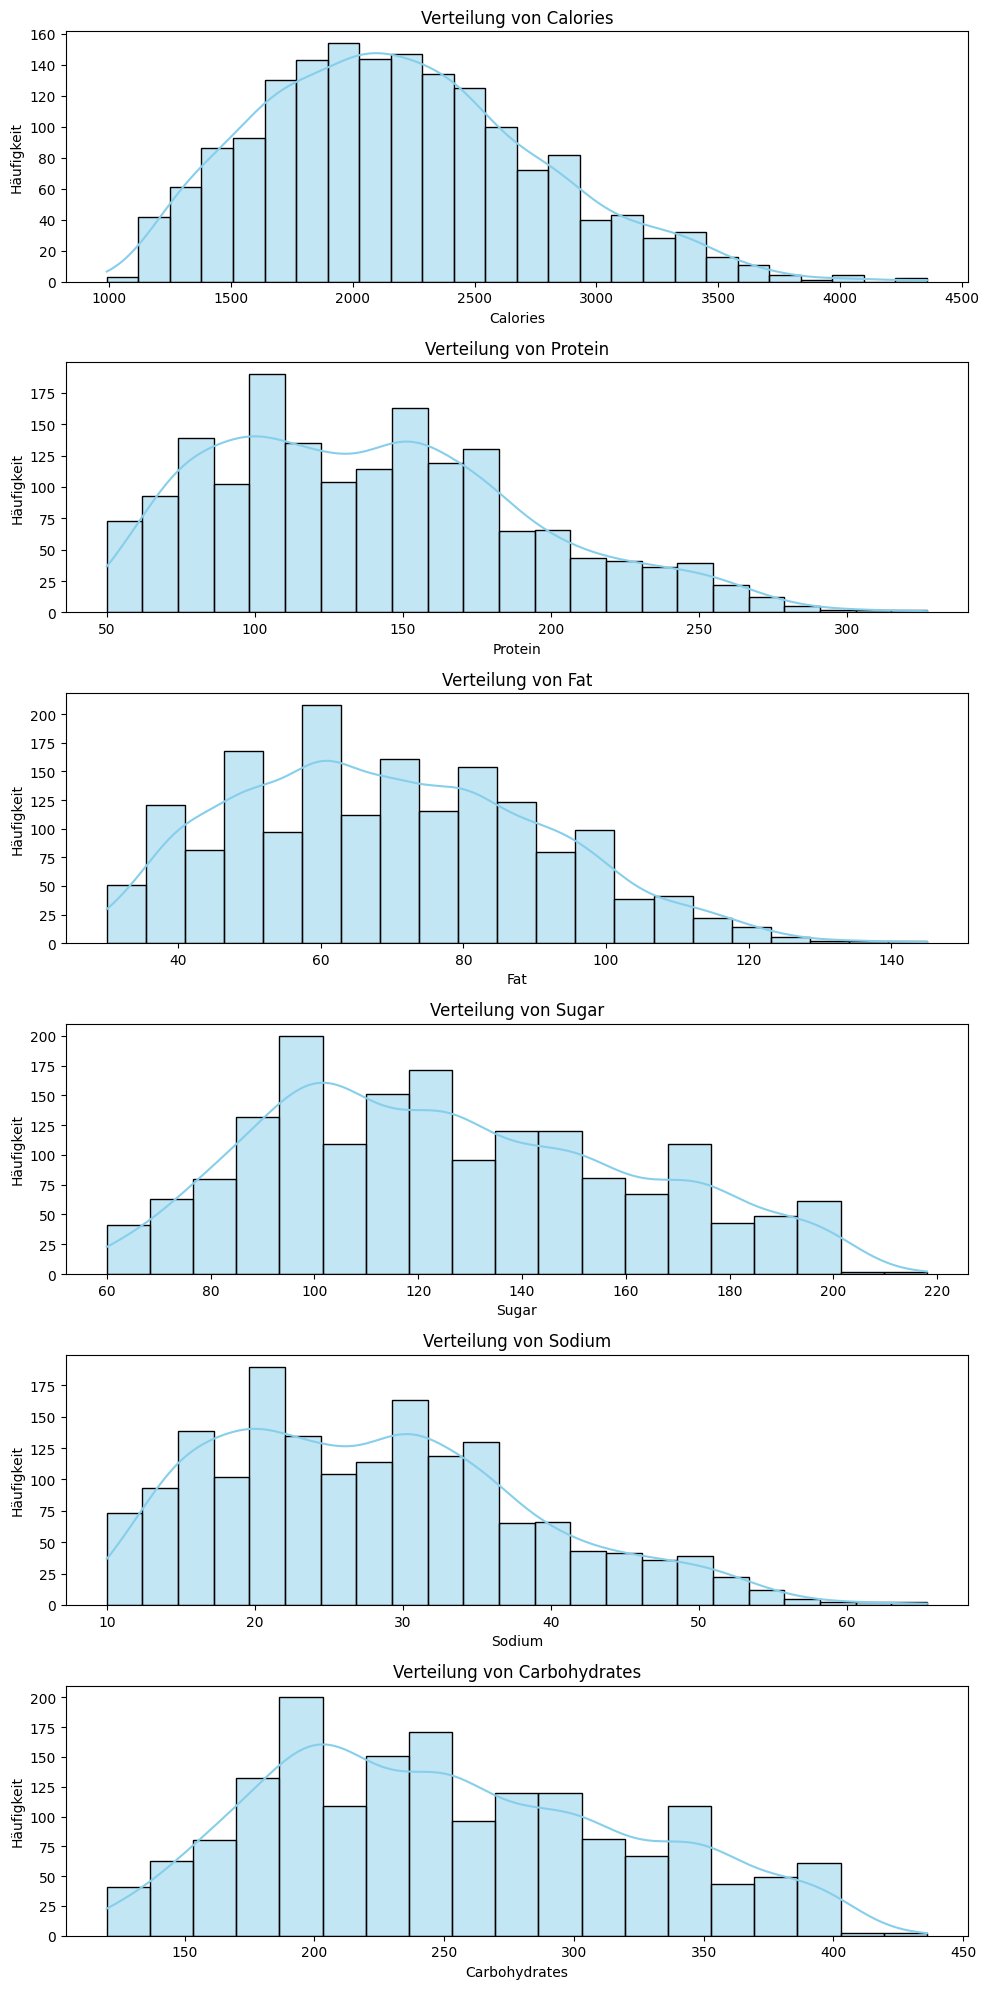

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Disease'>

Text(0.5, 1.0, 'Häufigkeit von Krankheiten (kombiniert)')

Text(0.5, 0, 'Krankheit(en)')

Text(0, 0.5, 'Anzahl Personen')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Weight Gain'),
  Text(1, 0, 'Weight Gain, Hypertension, Heart Disease'),
  Text(2, 0, 'Weight Gain, Kidney Disease'),
  Text(3, 0, 'Weight Gain, Hypertension, Heart Disease, Kidney Disease'),
  Text(4, 0, 'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease'),
  Text(5, 0, 'Diabetes, Acne, Hypertension, Heart Disease'),
  Text(6, 0, 'Hypertension, Heart Disease'),
  Text(7, 0, 'Diabetes, Acne, Weight Gain, Hypertension, Heart Disease, Kidney Disease'),
  Text(8, 0, 'Hypertension, Heart Disease, Kidney Disease'),
  Text(9, 0, 'Kidney Disease'),
  Text(10, 0, 'Hypertension, Kidney Disease'),
  Text(11, 0, 'Diabetes, Acne, Weight Loss, Hypertension, Heart Disease, Kidney Disease'),
  Text(12, 0, 'Diabetes, Acne, Hypertension, Kidney Disease')])

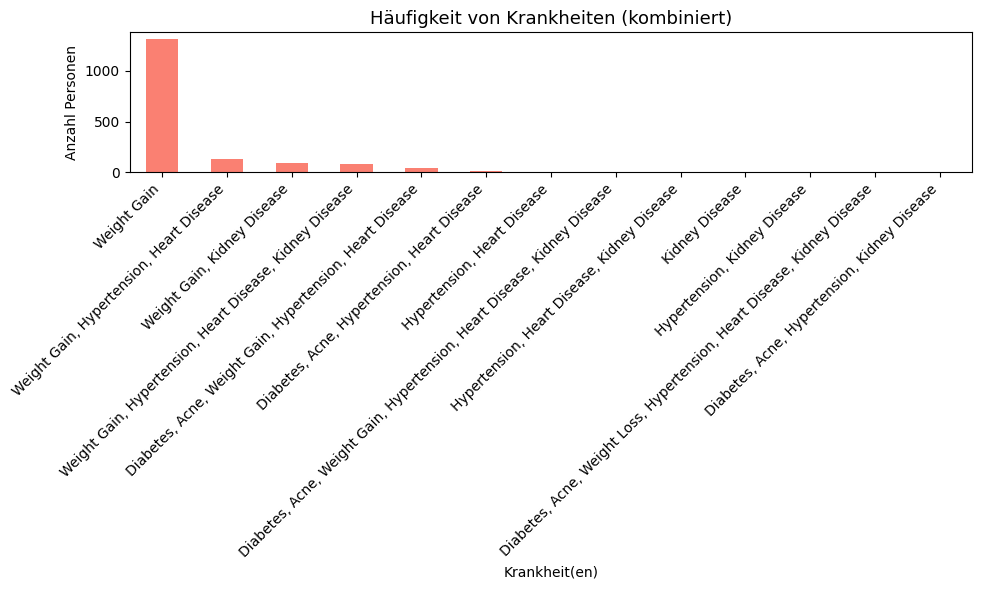

<Figure size 800x600 with 0 Axes>

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/846610463.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Gender', ylabel='Calories'>

Text(0.5, 1.0, 'Kalorienaufnahme nach Geschlecht')

Text(0.5, 0, 'Geschlecht')

Text(0, 0.5, 'Kalorien')

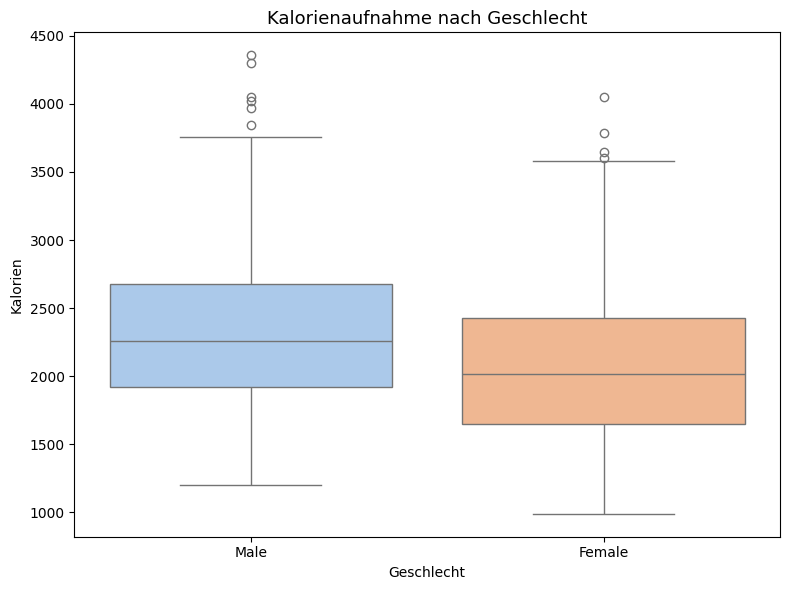

Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):

                count     mean     std    min     25%     50%     75%     max  \
Calories       1697.0  2196.64  571.20  990.0  1770.0  2146.0  2550.0  4357.0   
Protein        1697.0   139.90   53.34   50.0   100.0   136.0   174.0   327.0   
Fat            1697.0    69.71   21.44   30.0    52.0    69.0    85.0   145.0   
Sugar          1697.0   126.21   34.94   60.0   100.0   124.0   150.0   218.0   
Sodium         1697.0    27.98   10.67   10.0    20.0    27.2    34.8    65.4   
Carbohydrates  1697.0   252.42   69.88  120.0   200.0   248.0   300.0   436.0   

               median  skewness  kurtosis  
Calories       2146.0      0.47     -0.11  
Protein         136.0      0.54     -0.26  
Fat              69.0      0.35     -0.43  
Sugar           124.0      0.32     -0.77  
Sodium           27.2      0.54     -0.26  
Carbohydrates   248.0      0.32     -0.77  


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Korrelation zwischen Makronährstoffen')

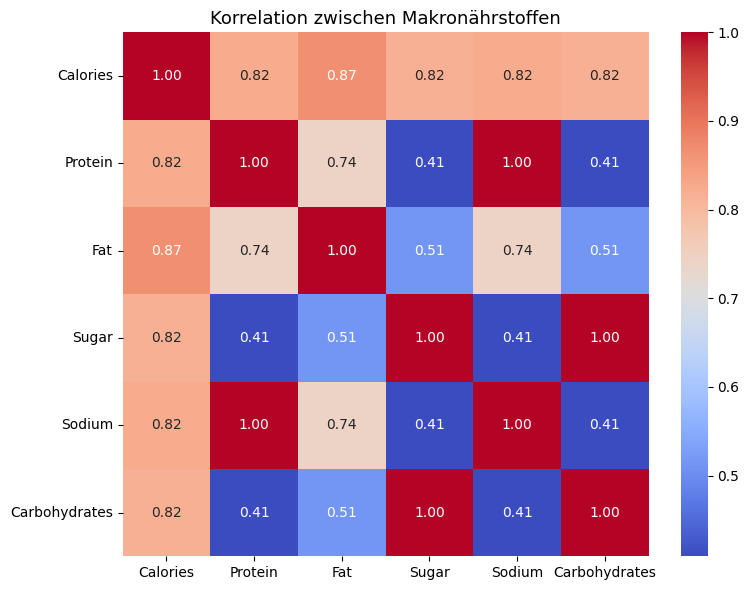

Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):

                count     mean     std    min     25%     50%     75%     max  \
Calories       1697.0  2196.64  571.20  990.0  1770.0  2146.0  2550.0  4357.0   
Protein        1697.0   139.90   53.34   50.0   100.0   136.0   174.0   327.0   
Fat            1697.0    69.71   21.44   30.0    52.0    69.0    85.0   145.0   
Sugar          1697.0   126.21   34.94   60.0   100.0   124.0   150.0   218.0   
Sodium         1697.0    27.98   10.67   10.0    20.0    27.2    34.8    65.4   
Carbohydrates  1697.0   252.42   69.88  120.0   200.0   248.0   300.0   436.0   

               median  skewness  kurtosis  
Calories       2146.0      0.47     -0.11  
Protein         136.0      0.54     -0.26  
Fat              69.0      0.35     -0.43  
Sugar           124.0      0.32     -0.77  
Sodium           27.2      0.54     -0.26  
Carbohydrates   248.0      0.32     -0.77  


In [ ]:
# =====================================
# Schritt 3.1: Explorative Datenanalyse (EDA)
# =====================================

# ------------------------------
# 3.1.1 Verteilung der Makronährstoffe
# ------------------------------
macro_columns = ["Calories", "Protein", "Fat", "Sugar", "Sodium", "Carbohydrates"]
fig1, axes = plt.subplots(len(macro_columns), 1, figsize=(10, 20))

for i, col in enumerate(macro_columns):
    sns.histplot(df_meals[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Verteilung von {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Häufigkeit")

plt.tight_layout()
plt.show()

# ------------------------------
# 3.1.2 Häufigkeit von Krankheiten
# ------------------------------
plt.figure(figsize=(10, 6))
df_meals["Disease"].value_counts().plot(kind="bar", color="salmon")
plt.title("Häufigkeit von Krankheiten (kombiniert)", fontsize=13)
plt.xlabel("Krankheit(en)")
plt.ylabel("Anzahl Personen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ------------------------------
# 3.1.3 Vergleich Kalorienaufnahme nach Geschlecht
# ------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_meals, x="Gender", y="Calories", palette="pastel")
plt.title("Kalorienaufnahme nach Geschlecht", fontsize=13)
plt.xlabel("Geschlecht")
plt.ylabel("Kalorien")
plt.tight_layout()
plt.show()




# ------------------------------
# 3.1.4 Deskriptive Statistik mit erweiterten Kennzahlen
# ------------------------------
columns = ["Calories", "Protein", "Fat", "Sugar", "Sodium", "Carbohydrates"]
desc_stats = df_meals[columns].describe().T  # count, mean, std, min, 25%, 50%, 75%, max
desc_stats["median"] = df_meals[columns].median()
desc_stats["skewness"] = df_meals[columns].skew()
desc_stats["kurtosis"] = df_meals[columns].kurt()

# Ausgabe als Tabelle
print("Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):\n")
print(desc_stats.round(2))

# ------------------------------
# 3.1.5 Korrelationen (Heatmap)
# ------------------------------
correlation_matrix = df_meals[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelation zwischen Makronährstoffen", fontsize=13)
plt.tight_layout()
plt.show()


# ------------------------------
# 3.1.6 Deskriptive Statistik mit erweiterten Kennzahlen
# ------------------------------
columns = ["Calories", "Protein", "Fat", "Sugar", "Sodium", "Carbohydrates"]
desc_stats = df_meals[columns].describe().T  # count, mean, std, min, 25%, 50%, 75%, max
desc_stats["median"] = df_meals[columns].median()
desc_stats["skewness"] = df_meals[columns].skew()
desc_stats["kurtosis"] = df_meals[columns].kurt()

# Ausgabe als Tabelle
print("Deskriptive Statistik (inkl. Median, Schiefe & Kurtosis):\n")
print(desc_stats.round(2))



**Schritt 3: 2. Ernährungsmuster identifizieren**

- **Clusteranalyse:** Verwendung von Algorithmen wie K-Means oder Hierarchical Clustering, um Ernährungsmuster zu identifizieren.
Die 12 berechnete Ernähtungs Features werden  mit dropna nach unvollständige gfiltert und die unvollständige werden entfernt, nach dr Standardtiserung(Alle Features werden auf den selben Masstab verbracht) der Daten welche wichtig sind. fFür PCA & Clustering wird PCA reduziert auf 2d welche für visualsierungen ebenfalls gut ist. Es wird eine KMeans-Clustering durch geführt welche basierend auf PCA-Werten sind.
Schlussendlich werden PCA Werten in seperaten Data Frames gespeichert. Anschliesedn wird eine PCA 2D-Scaterplot  cluster visualsiert.
Mit dem Model RandomForest wird auf target_chronic (Kronsiche Krankheit trainsiert)
- **Interpretation der Cluster:** Analysiere die Cluster, um typische Ernährungsmuster zu beschreiben.

<Figure size 1000x600 with 0 Axes>

Text(1.1917723792418133, 0.6673809794463152, '🟢 Cluster 0:\nProteinreich\nNiedriges Risiko')

Text(-1.748838063579604, 0.5162915930369298, '🟠 Cluster 1:\nSnacklastig\nMittleres Risiko')

Text(0.13742194088270882, -1.7245920826523728, '🔵 Cluster 2:\nCarb-Frühstück\nHöchstes Risiko')

Text(0.5, 1.0, 'KAQ 1: Ernährungsmuster-Clustering (beschriftet)')

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/3259244358.py:72: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/3259244358.py:72: UserWarning:

Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/3259244358.py:72: UserWarning:

Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.

/Users/muratayhekim/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.

/Users/muratayhekim/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.

/Users/muratayhekim/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128309 

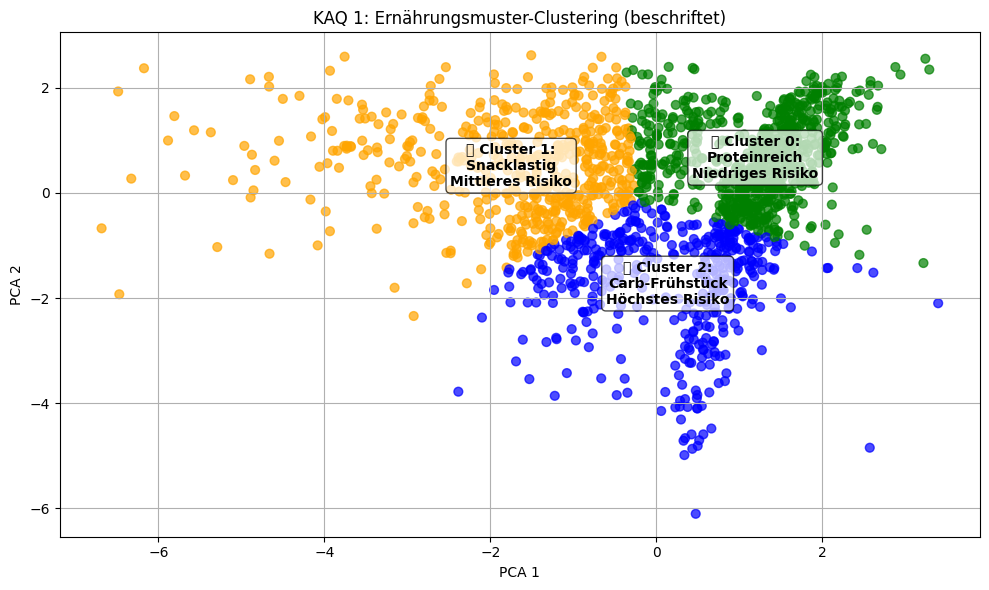

<Figure size 1000x600 with 0 Axes>

Text(1.8913387970158633, 0.8360094366201003, '🟢 Cluster 0:\nProteinreich')

Text(-1.2793826254745253, 0.18931285439020015, '🟠 Cluster 1:\nFett-/Zuckerreich')

Text(1.0223013980168545, -1.2756217117557995, '🔵 Cluster 2:\nCarblastig')

Text(0.5, 1.0, 'Clustering auf Protein, Fett, Carbs, Zucker (beschriftet)')

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/3259244358.py:115: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/3259244358.py:115: UserWarning:

Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/3259244358.py:115: UserWarning:

Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.

/Users/muratayhekim/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.

/Users/muratayhekim/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.

/Users/muratayhekim/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 1283

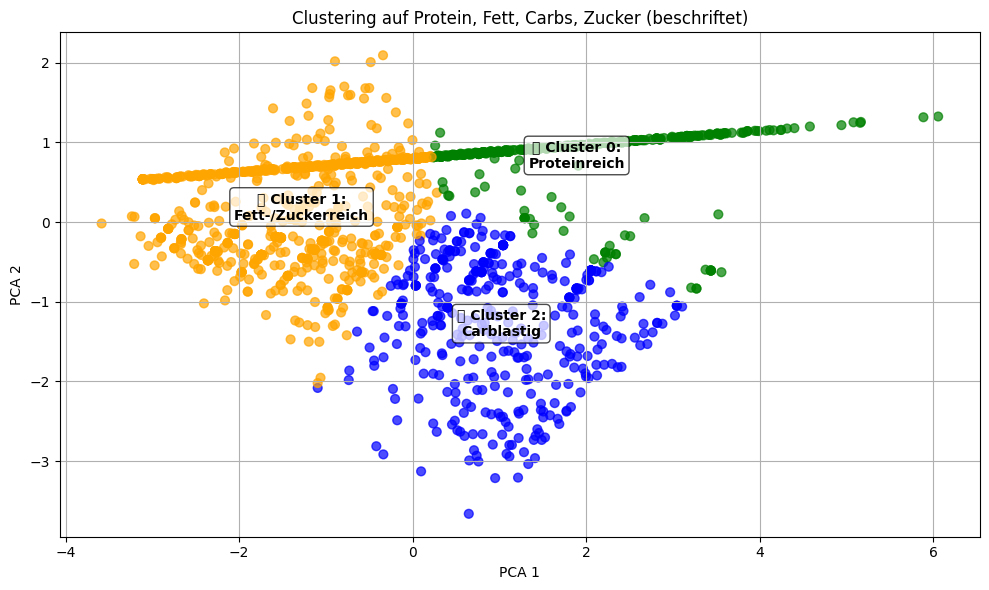

In [ ]:
# =====================================
# Schritt 3.2: Ernährungsmuster identifizieren
# =====================================

# =====================================
# Analyse KAQ 1: Welche Ernährungsmuster lassen sich aus individuellen Makronährstoffprofilen ableiten – und welche Krankheitsrisiken sind damit verbunden?
# Methode: KMeans-Clusteranalyse auf Protein, Fett, Zucker, Kalorien, etc.
# Ziel: Ernährungstypen identifizieren
# Zusatzanalyse: Krankheitsverteilung je Cluster
# Visualisierung: Clusterplot, Balkendiagramm Krankheitsprävalenz
# =====================================


# 3. Clustering (KAQ 1) - 1
# Clustering (KAQ 1) - 1 mit Beschriftung
features_kaq1 = [
    "Protein_per_100kcal", "Fat_to_Protein_Ratio", "Sugar_per_Carb",
    "Snack_Energy_Share", "Carb_ratio_breakfast", "Calories_exceed_target",
    "Protein_deficit_ratio"
]

df_kaq1 = df_meals[features_kaq1 + ["Target_Chronic", "Risk_Flag"]].dropna().copy()
# Neue Flags für Unausgewogenheit erstellen
df_kaq1["Under_Protein"] = (df_kaq1["Protein_deficit_ratio"] < 1.0).astype(int)
df_kaq1["High_Sugar_Carb"] = (df_kaq1["Sugar_per_Carb"] > 0.3).astype(int)
df_kaq1["High_Snacks"] = (df_kaq1["Snack_Energy_Share"] > 0.15).astype(int)
df_kaq1["Fat_Heavy"] = (df_kaq1["Fat_to_Protein_Ratio"] > 1.0).astype(int)
df_kaq1["Unausgewogen"] = (
    df_kaq1["Under_Protein"] +
    df_kaq1["High_Sugar_Carb"] +
    df_kaq1["High_Snacks"] +
    df_kaq1["Calories_exceed_target"] +
    df_kaq1["Fat_Heavy"]
)
df_kaq1["Unausgewogen_Flag"] = (df_kaq1["Unausgewogen"] >= 2).astype(int)





# Clustering + PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kaq1[features_kaq1])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

df_kaq1["Cluster"] = clusters
df_kaq1["PCA1"] = X_pca[:, 0]
df_kaq1["PCA2"] = X_pca[:, 1]

farben = {0: "green", 1: "orange", 2: "blue"}
farben_liste = df_kaq1["Cluster"].map(farben)
cluster_labels = {
    0: "🟢 Cluster 0:\nProteinreich\nNiedriges Risiko",
    1: "🟠 Cluster 1:\nSnacklastig\nMittleres Risiko",
    2: "🔵 Cluster 2:\nCarb-Frühstück\nHöchstes Risiko"
}

plt.figure(figsize=(10, 6))
plt.scatter(df_kaq1["PCA1"], df_kaq1["PCA2"], c=farben_liste, s=40, alpha=0.7)
for cluster_id, label in cluster_labels.items():
    x_mean = df_kaq1[df_kaq1["Cluster"] == cluster_id]["PCA1"].mean()
    y_mean = df_kaq1[df_kaq1["Cluster"] == cluster_id]["PCA2"].mean()
    plt.text(x_mean, y_mean, label, fontsize=10, weight='bold', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
plt.title("KAQ 1: Ernährungsmuster-Clustering (beschriftet)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()



# Definition der Basis-Nährstoff-Features
features_basic = ["Protein", "Fat", "Carbohydrates", "Sugar"]

# DataFrame für Basis-Clustering:
df_basic = df_meals[features_basic].dropna().copy()


# Clustering auf Basis-Nährstoffe mit Beschriftung
scaler = StandardScaler()
X_scaled_basic = scaler.fit_transform(df_basic)
pca_basic = PCA(n_components=2)
X_pca_basic = pca_basic.fit_transform(X_scaled_basic)
kmeans_basic = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_basic = kmeans_basic.fit_predict(X_pca_basic)

df_basic["Cluster"] = clusters_basic
df_basic["PCA1"] = X_pca_basic[:, 0]
df_basic["PCA2"] = X_pca_basic[:, 1]

farben_basic = {0: "green", 1: "orange", 2: "blue"}
farben_liste_basic = df_basic["Cluster"].map(farben_basic)
cluster_labels_basic = {
    0: "🟢 Cluster 0:\nProteinreich",
    1: "🟠 Cluster 1:\nFett-/Zuckerreich",
    2: "🔵 Cluster 2:\nCarblastig"
}

plt.figure(figsize=(10, 6))
plt.scatter(df_basic["PCA1"], df_basic["PCA2"], c=farben_liste_basic, s=40, alpha=0.7)
for cluster_id, label in cluster_labels_basic.items():
    x_mean = df_basic[df_basic["Cluster"] == cluster_id]["PCA1"].mean()
    y_mean = df_basic[df_basic["Cluster"] == cluster_id]["PCA2"].mean()
    plt.text(x_mean, y_mean, label, fontsize=10, weight='bold', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
plt.title("Clustering auf Protein, Fett, Carbs, Zucker (beschriftet)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()




# Plotly HBar für KAQ 1 Features
cluster_summary = df_kaq1.groupby("Cluster")[features_kaq1].mean().reset_index()
df_melt = cluster_summary.melt(id_vars="Cluster", var_name="Feature", value_name="Wert")
fig = px.bar(df_melt, x="Wert", y="Feature", color="Cluster", orientation="h", barmode="group",
             color_discrete_map={0: "green", 1: "orange", 2: "blue"}, height=600,
             title="Ernährungsmuster je Cluster (features_kaq1)")
fig.update_layout(xaxis_title="Durchschnittlicher Wert", yaxis_title="Feature", legend_title="Cluster", template="plotly_white")
fig.show()

# Plotly HBar für Basis-Nährstoffe
cluster_summary_basic = df_basic.groupby("Cluster")[features_basic].mean().reset_index()
df_melt_basic = cluster_summary_basic.melt(id_vars="Cluster", var_name="Feature", value_name="Wert")
fig_basic = px.bar(df_melt_basic, x="Wert", y="Feature", color="Cluster", orientation="h", barmode="group",
                   color_discrete_map={0: "green", 1: "orange", 2: "blue"}, height=500,
                   title="Basis-Nährstoffe je Cluster")
fig_basic.update_layout(xaxis_title="Durchschnittlicher Wert (g)", yaxis_title="Basis-Nährstoff", legend_title="Cluster", template="plotly_white")
fig_basic.show()




# Anteil Unausgewogener je Cluster
unausgewogen_summary = df_kaq1.groupby("Cluster")[["Unausgewogen_Flag"]].mean().reset_index()
fig_unaus = px.bar(unausgewogen_summary, x="Cluster", y="Unausgewogen_Flag", color="Cluster",
                   color_discrete_map={0: "green", 1: "orange", 2: "blue"},
                   title="Anteil Unausgewogener Ernährung je Cluster",
                   labels={"Unausgewogen_Flag": "Anteil (%)"}, text_auto=".1%", height=400)
fig_unaus.update_layout(template="plotly_white", yaxis_tickformat=".0%")
fig_unaus.show()



In [ ]:
# =====================================
# Schritt 3.3: Zusammenhang zwischen Ernährung und Krankheitsrisiken
# =====================================

In [ ]:
# =====================================
# Schritt 3.4: Identifikation unausgewogener Ernährungsmuster
# =====================================

In [ ]:
# =====================================
# Schritt 3.5: Vergleich von Personen mit und ohne Krankheit
# =====================================

In [ ]:
# =====================================
# Schritt 3.6: Empfehlungen basierend auf Clusterbildung
# =====================================

<Axes: xlabel='Disease_Count', ylabel='Sugar'>

Text(0.5, 1.0, 'Zuckerzufuhr bei Personen mit und ohne Krankheit')

Text(0.5, 0, 'Krankheit vorhanden?')

Text(0, 0.5, 'Zucker (g pro Tag)')

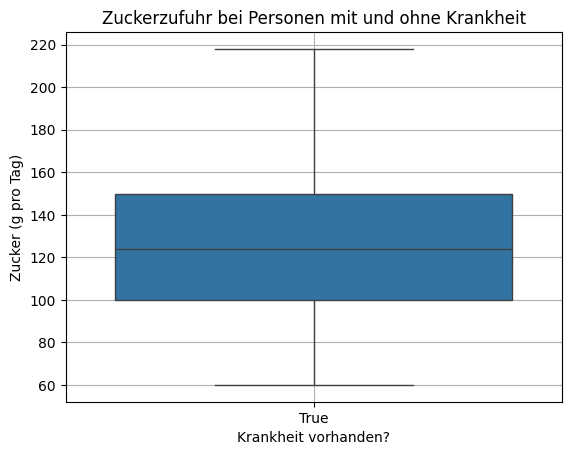

Personen mit Krankheit weisen im Median einen leicht höheren Zuckerkonsum auf.


In [ ]:
# =====================================
# Schritt 3: Explorative Analyse nach IBCS
# =====================================

# 🧠 Frage: Unterscheiden sich kranke und gesunde Personen im Zuckerkonsum?
# 🎯 Ziel: Visuelle Verteilung und Mittelwertunterschied zeigen

sns.boxplot(data=df_meals, x=df_meals["Disease_Count"] > 0, y="Sugar")
plt.title("Zuckerzufuhr bei Personen mit und ohne Krankheit")
plt.xlabel("Krankheit vorhanden?")
plt.ylabel("Zucker (g pro Tag)")
plt.grid(True)
plt.show()

# SAY-Prinzip (Kommentar zur Grafik)
print("Personen mit Krankheit weisen im Median einen leicht höheren Zuckerkonsum auf.")


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'PCA + KMeans Clustering der Ernährungsmuster')

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

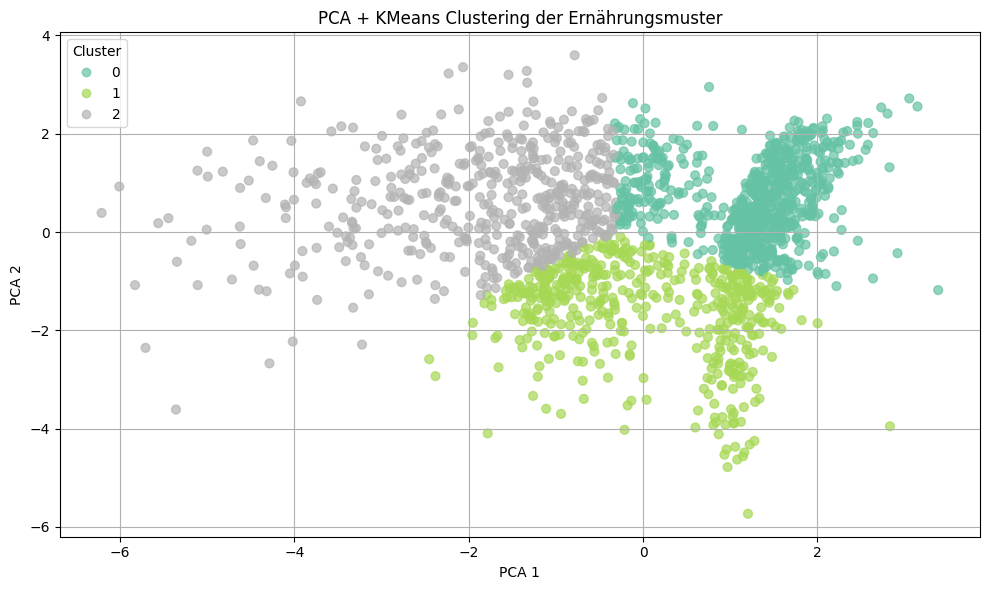

RandomForestClassifier(class_weight='balanced', max_depth=22,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=1, random_state=42)

<Figure size 800x500 with 0 Axes>

/var/folders/7f/11912_rn5y34qkv95bl25kvc0000gn/T/ipykernel_61106/714985529.py:78: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Cluster', ylabel='Protein_per_100kcal'>

Text(0.5, 1.0, 'Protein pro 100kcal nach Cluster')

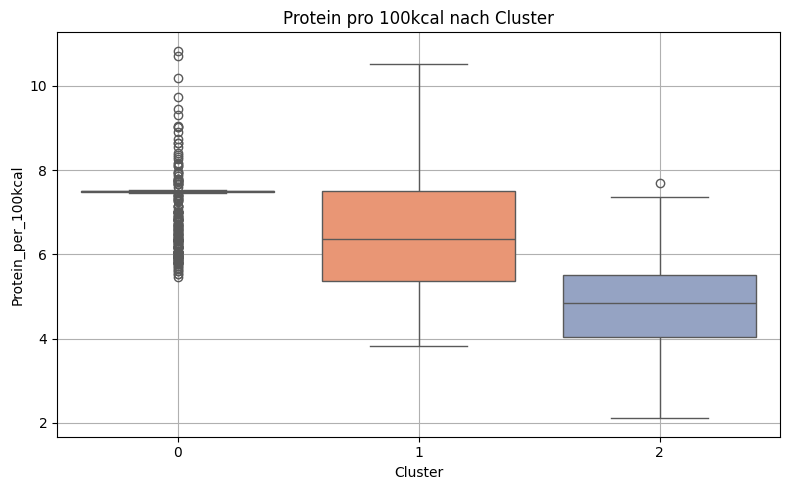


📊 Cluster-Zusammenfassung:


,Protein_per_100kcal,Fat_to_Protein_Ratio,Carb_to_Fat_Ratio,Sugar_per_Carb,Calories_exceed_target,Sugar_excess,Protein_deficit_ratio,Protein_Lunch_vs_Dinner,Snack_Energy_Share,Carb_ratio_breakfast,Protein_std,Macronutrient_Diversity
Cluster,,,,,,,,,,,,
0,7.312107,0.437979,3.412548,0.5,0.060942,1.0,3.095713,1.716339,0.083474,0.167512,28.335241,5.0
1,6.376788,0.539198,3.431957,0.5,0.055785,1.0,1.840356,2.118420,0.127950,0.285478,18.636905,5.0
2,4.727439,0.683489,4.904095,0.5,0.446029,1.0,1.642273,1.814301,0.098042,0.163984,17.000134,5.0



🎯 Klassifikationsmetriken:


,precision,recall,f1-score,support
0,0.946768,0.950382,0.948571,262.000000
1,0.831169,0.820513,0.825806,78.000000
accuracy,0.920588,0.920588,0.920588,0.920588
macro avg,0.888968,0.885447,0.887189,340.000000
weighted avg,0.920248,0.920588,0.920408,340.000000


In [ ]:
#Ernährungsmuster visuell erkennen (z. B. Cluster 1 = „Proteinreich und risikoarm“)
#Krankheitsrisiken vorhersagen (RandomForest auf Basis deiner Features)
#Datenqualität prüfen (z. B. ob Cluster mit Risk_Flag oder Target_Chronic übereinstimmen)
#Zielgruppen ableiten für personalisierte Ernährungsempfehlungen


# === 1. Feature-Auswahl ===
features = [
    "Protein_per_100kcal", "Fat_to_Protein_Ratio", "Carb_to_Fat_Ratio", "Sugar_per_Carb",
    "Calories_exceed_target", "Sugar_excess", "Protein_deficit_ratio",
    "Protein_Lunch_vs_Dinner", "Snack_Energy_Share", "Carb_ratio_breakfast",
    "Protein_std", "Macronutrient_Diversity"
]

# ✅ Nur vollständige Zeilen verwenden
df_cluster = df_meals[features + ["Target_Chronic"]].dropna().copy()

# === 2. Standardisieren ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster[features])

# === 3. PCA → 2D-Reduktion
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === 4. KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# === 5. Cluster + PCA in df_meals schreiben
df_meals_clean = df_meals.loc[df_cluster.index].copy()
df_meals_clean["Cluster"] = clusters
df_meals_clean["PCA1"] = X_pca[:, 0]
df_meals_clean["PCA2"] = X_pca[:, 1]

# === 6. Cluster-Zusammenfassung
cluster_summary = df_meals_clean.groupby("Cluster")[features].mean()

# === 7. Cluster-Visualisierung (PCA 2D)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set2', s=40, alpha=0.7)
plt.title("PCA + KMeans Clustering der Ernährungsmuster")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

# === 8. Klassifikation: Target_Chronic
X = df_cluster[features]
y = df_cluster["Target_Chronic"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=22,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    n_jobs=1,  # statt -1, um Fehler zu vermeiden
    random_state=42
)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# === 9. Klassifikationsmetriken
report = classification_report(y_test, y_pred, output_dict=True)
metrics = pd.DataFrame(report).T

# === 10. Optional: Boxplot pro Cluster für ein Feature
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_meals_clean, x="Cluster", y="Protein_per_100kcal", palette="Set2")
plt.title("Protein pro 100kcal nach Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 11. Ausgabe
print("\n📊 Cluster-Zusammenfassung:")
display(cluster_summary)

print("\n🎯 Klassifikationsmetriken:")
display(metrics)


In [ ]:
def vorhersage_chronisches_risiko(input_dict, model, feature_list):
    """
    Gibt eine Vorhersage für chronisches Risiko zurück (basierend auf Random Forest Modell).

    :param input_dict: dict – Eingabewerte für eine Person (z. B. {"Protein_per_100kcal": 5.0, ...})
    :param model: sklearn-Modell – z. B. trainierter RandomForestClassifier
    :param feature_list: list – Liste der Feature-Namen in richtiger Reihenfolge
    :return: Tuple (Label-Text, Wahrscheinlichkeit in %)
    """
    import pandas as pd

    # Eingabe in DataFrame umwandeln
    input_df = pd.DataFrame([input_dict])[feature_list]

    # Vorhersage & Wahrscheinlichkeit
    prediction = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][prediction]

    # Label interpretieren
    label_text = "chronisches Risiko vorhanden" if prediction == 1 else "kein chronisches Risiko"

    return label_text, round(prob * 100, 2)


In [ ]:
#Feature Enginerring nachträglich am 23.04.2025 von kay hinzugefügt
#Altersbereiche (age_min, age_max) zu extrahieren, Den passenden Protein-Referenzwert (oder andere Nährstoffe) je Person aus df_meals zu matchen, Eine Abweichung als Verhältnis (Protein / Protein_BLV) zu berechnen



# 2. Erste Zeile als Spaltenüberschriften setzen
blv_nutrient_requirements.columns = blv_nutrient_requirements.iloc[0]
blv_nutrient_requirements = blv_nutrient_requirements.drop(0)

# 3. Spalten korrekt benennen
blv_nutrient_requirements.rename(columns={
    blv_nutrient_requirements.columns[0]: "sex",
    blv_nutrient_requirements.columns[1]: "age_range"
}, inplace=True)

# 4. Altersbereich extrahieren
def parse_age_range(age_str):
    if pd.isna(age_str):
        return (None, None)
    age_str = str(age_str).strip().lower().replace("jahre", "").replace("years", "").replace("y", "")
    age_str = age_str.replace(">", "").replace("<", "").replace("+", "").replace("m", "").strip()
    try:
        if "to" in age_str:
            parts = age_str.split("to")
            min_age = float(parts[0].strip())
            max_age = float(parts[1].strip())
            return min_age / 12 if "m" in age_str else min_age, max_age / 12 if "m" in age_str else max_age
        else:
            val = float(age_str.strip())
            return val, val
    except:
        return (None, None)

blv_nutrient_requirements[["age_min", "age_max"]] = blv_nutrient_requirements["age_range"].apply(
    lambda x: pd.Series(parse_age_range(x))
)

# 5. Protein-Spalte korrekt finden und umbenennen
for col in blv_nutrient_requirements.columns:
    if isinstance(col, str) and "Protein" in col and "(g/kg/d)" in col:
        blv_nutrient_requirements.rename(columns={col: "Protein_BLV"}, inplace=True)


# 7. Matching-Funktion
def get_blv_protein(age, gender):
    match = blv_nutrient_requirements[
        (blv_nutrient_requirements["sex"].str.lower() == gender.lower()) &
        (blv_nutrient_requirements["age_min"].astype(float) <= age) &
        (blv_nutrient_requirements["age_max"].astype(float) >= age)
    ]
    if not match.empty:
        return float(match["Protein_BLV"].values[0])
    else:
        return None

# 8. Anwenden auf df_meals
df_meals["Protein_BLV_Ref"] = df_meals.apply(
    lambda row: get_blv_protein(row["Ages"], row["Gender"]), axis=1
)

# 9. Verhältnis berechnen
df_meals["Protein_to_BLV_ratio"] = df_meals["Protein"] / (df_meals["Protein_BLV_Ref"] + 1e-6)

# 10. Vorschau
df_meals[["Ages", "Gender", "Protein", "Protein_BLV_Ref", "Protein_to_BLV_ratio"]].head()

print(blv_nutrient_requirements.columns.tolist())

KeyError: 'Protein_BLV'

---

## ✅ **Orientierungswerte für eine gesunde Ernährung**  
(*Idealbereich – für Erwachsene mit normalem Energiebedarf, z. B. 2000–2500 kcal*)

| Feature | Idealwert / Zielbereich | Bedeutung |
|--------|--------------------------|-----------|
| **Protein_per_100kcal** | **> 4.5** | Eiweißdicht – gute Sättigung, Muskelversorgung |
| **Fat_to_Protein_Ratio** | **0.5–1.0** | Ausgewogen: weder zu fett- noch zu eiweißlastig |
| **Carb_to_Fat_Ratio** | **3–5** | Kohlenhydrate überwiegen, aber nicht extrem |
| **Sugar_per_Carb** | **< 0.2** | Max. 20 % der Carbs sollten Zucker sein |
| **Calories_exceed_target** | **0** | Ziel sollte nicht regelmäßig überschritten werden |
| **Sugar_excess** | **0** | Max. 50 g Zucker pro Tag, besser weniger |
| **Protein_deficit_ratio** | **> 1.0** | Mindestens 100 % des Proteinbedarfs decken |
| **Protein_Lunch_vs_Dinner** | **≈ 1.0** | Gleichmäßige Eiweißverteilung über den Tag |
| **Snack_Energy_Share** | **< 0.10** | Snacks max. 10 % der Gesamtkalorien |
| **Carb_ratio_breakfast** | **~ 0.2–0.3** | Ca. 20–30 % der Carbs zum Frühstück |
| **Protein_std** | **< 10** | Gleichmäßige Proteinzufuhr über alle Mahlzeiten |
| **Macronutrient_Diversity** | **5** | Alle 5 Makros vorhanden: Protein, Fett, Carbs, Zucker, Ballaststoffe |

---

### 🧠 Zusammengefasst:  
Ein „gesundes“ Ernährungsprofil wäre z. B.:

- **Viel Protein pro Kalorie** → gute Qualität
- **Wenig Zucker im Verhältnis zu Carbs**
- **Snacks moderat**
- **Verteilung der Makros über den Tag**
- **Kein Kalorienüberschuss**
- **Alle Makronährstoffe dabei**

---


In [ ]:

beispiel_input = {
    # Anteil von Protein pro 100 kcal – zeigt Eiweißdichte der Ernährung
    "Protein_per_100kcal": 5,  # z. B. 5g Eiweiß pro 100 kcal

    # Verhältnis von Fett zu Eiweiß – höher = fettreiche, eiweißarme Ernährung
    "Fat_to_Protein_Ratio": 0.6,  # z. B. 0.6g Fett pro 1g Eiweiß

    # Verhältnis von Kohlenhydraten zu Fett – hoher Wert = viele Carbs, wenig Fett
    "Carb_to_Fat_Ratio": 1.5,  # z. B. 4.5g Carbs pro 1g Fett

    # Anteil Zucker an den gesamten Kohlenhydraten
    "Sugar_per_Carb": 0.4,  # z. B. 40% der Kohlenhydrate sind Zucker

    # 1 = Person hat Kalorienziel überschritten (Daily Calorie Target), 0 = nicht
    "Calories_exceed_target": 1,  # Ja

    # 1 = Person hat mehr als 50g Zucker aufgenommen, 0 = nein
    "Sugar_excess": 0,  # Ja

    # Verhältnis tatsächlicher Proteinzufuhr zur Empfehlung gem. BLV
    "Protein_deficit_ratio": 0.7,  # z. B. nur 70% des benötigten Proteins aufgenommen

    # Verhältnis Protein Mittagessen zu Abendessen – sagt was über Tagesverteilung
    "Protein_Lunch_vs_Dinner": 2.0,  # doppelt so viel Eiweiß zu Mittag

    # Anteil der Snacks an den gesamten Tageskalorien
    "Snack_Energy_Share": 0.12,  # z. B. 12% der Kalorien stammen aus Snacks

    # Anteil der Frühstücks-Carbs an allen Carbs
    "Carb_ratio_breakfast": 0.2,  # 20% der Carbs werden beim Frühstück gegessen

    # Streuung der Proteinwerte über die Mahlzeiten – je höher, desto ungleichmäßiger verteilt
    "Protein_std": 15.0,  # z. B. starke Schwankungen bei Proteinzufuhr über den Tag

    # Wie viele Makronährstoffe wurden überhaupt konsumiert (>0g)?
    "Macronutrient_Diversity": 5  # alle 5 (Protein, Fett, Carbs, Zucker, Ballaststoffe)
}


# Aufruf mit deinem Modell (z. B. clf)
text, proz = vorhersage_chronisches_risiko(beispiel_input, clf, features)

print(f"🧪 Vorhersage: {text} ({proz}% Wahrscheinlichkeit)")


In [ ]:
#Welche Cluster sind eher „gesund“?
df_meals_clean.explode("Disease_List").groupby(["Cluster", "Disease_List"]).size().unstack().fillna(0)


**Schritt 3: 3. Zusammenhang zwischen Ernährung und Krankheitsrisiken**

- **Korrelationsanalyse:** Untersuchung der Korrelation zwischen Ernährungsmustern und Krankheitsrisiken.
- **Regressionsmodelle:** Erstelle Regressionsmodelle, um den Einfluss der Ernährung auf Krankheitsrisiken zu quantifizieren.

In [ ]:
# =====================================
# Schritt 5: Analyse KAQ
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

**Schritt 3: 4. Identifikation unausgewogener Ernährungsmuster**

- **Vergleich mit Empfehlungen:** Vergleiche der identifizierten Ernährungsmuster mit offiziellen Ernährungsempfehlungen.
- **Identifikation von Defizien/Überschüssen:** Bestimmung, welche Muster potenziell unausgewogen sind (z.B. zu wenig Protein, zu viel Zucker).

In [ ]:
# =====================================
# Schritt 5: Analyse KAQ
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

**Schritt 3: 5. Vergleich von Personen mit und ohne Krankheit**

- **Gruppenvergleich:** Vergleich der Ernähungsprofile von Personen mit und ohne Krankheiten.
- **Statistische Tests:** Verwendung von Tests wie dem t-Test, um signifikante Unterschiede zu identifizieren.

In [ ]:
# =====================================
# Schritt 6: Analyse KAQ
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

**Schritt 3: 6. Empfehlungen basierend auf Clusterbildung**

- **Personalisierte Empfehlungen:** Erstellung von personalisierten Ernährungsempfehlungen basierend auf den identifizierten Clustern.
- **Berücksichtigung von Krankheiten:** Integration von offiziellen Empfehlungen für bestimmte Krankheiten in die personalisierten Empfehlungen.

In [ ]:
# =====================================
# Schritt 7: Analyse KAQ
# =====================================

# 🧠 Frage: xxxxxx
# 🎯 Ziel: xxxxxx

**Schritt 4: Kommunikation für Entscheider**

- Visualisierung der Resultate (Dashboards, Diagramme)
- Empfehlungen je Zielgruppe
- Ableitung konkreter Maßnahmen oder Produktideen

In [ ]:
 # Ab hier macht murat was

In [ ]:
import pandas as pd
import plotly.express as px

# 1. Histogramm – Kalorienverteilung
px.histogram(df_meals, x="Calories", nbins=30, title="Verteilung der Tageskalorien").show()

# 2. Boxplot – Zuckeraufnahme nach Geschlecht
px.box(df_meals, x="Gender", y="Sugar", title="Zuckeraufnahme nach Geschlecht").show()

# 3. Scatterplot – Protein vs. Zucker nach Krankheit
px.scatter(
    df_meals,
    x="Protein",
    y="Sugar",
    color="Disease",
    title="Protein vs. Zuckeraufnahme nach Krankheit",
    hover_data=["Ages", "Gender"]
).show()

# 4. Violinplot – Fettzufuhr je Aktivitätslevel
px.violin(
    df_meals,
    x="Activity Level",
    y="Fat",
    box=True,
    points="all",
    title="Fettzufuhr je Aktivitätslevel"
).show()

Super, danke fürs Teilen des Screenshots! Ich sehe sofort, was du meinst. Hier kommt die Analyse deiner **Scatterplot-Visualisierung (Protein vs. Zucker) mit Trendlinie**:

---

### 📊 **Was zeigt dieser Plot?**

- **X-Achse:** Proteinaufnahme pro Tag (in g)
- **Y-Achse:** Zuckeraufnahme pro Tag (in g)
- **Jeder Punkt:** Eine Person aus dem Datensatz
- **Farben:** Krankheit(en) der jeweiligen Person
- **Gerade Linie:** Eine **Trendlinie (Regression)** → zeigt den **durchschnittlichen Zusammenhang**

---

### 📈 **Interpretation der steigenden Trendlinie**

- Die **positive Steigung** der Linie bedeutet:  
  **Mehr Protein → tendenziell auch mehr Zuckeraufnahme.**

- Das kann ein Hinweis sein auf:
  - Allgemein **höheren Energiebedarf** (z. B. sportliche oder junge Personen)
  - Ernährungsmuster, bei denen **Makros insgesamt steigen** (z. B. durch große Portionen oder energie-dichte Lebensmittel)

---

### 🩺 **Bezug zu Krankheiten**

- Der Datensatz zeigt:
  - Auch Personen mit mehreren Krankheiten (z. B. *Diabetes*, *Heart Disease*) liegen in diesem Bereich mit **hoher Protein- und Zuckeraufnahme**.
  - Diese Ballung könnte für **KAQ 1 und KAQ 3** interessant sein:
    > Gibt es Cluster mit hohem Zucker & Protein, die **häufiger krank** sind?

---

### 🧠 **Ideen für weiterführende Schritte:**

1. **Clustering:** Nutze K-Means oder DBSCAN, um Gruppen mit ähnlichem Makroprofil zu finden.
2. **Split nach Krankheit:** Mache den gleichen Scatterplot **nur für Diabetiker** vs. **Nicht-Diabetiker**.
3. **Korrelation berechnen:** z. B. Pearson- oder Spearman-Korrelation zwischen Protein & Zucker.
4. **Deckungsgrade:** Wie gut erfüllen diese Gruppen die BLV-Empfehlungen?

---

Wenn du willst, kann ich dir den Code liefern, um das alles direkt im Notebook umzusetzen. Oder ich rechne dir als Nächstes die Korrelation aus – sag einfach, was dir lieber ist.

In [ ]:
# 📦 Importiere notwendige Module
import os
from nbformat import read
from nbformat.validator import validate

# 📍 Definiere den vollständigen Pfad zu deinem Notebook
notebook_path = r"onlyAnalysis_Ernährung.ipynb"

# 🧪 Überprüfe, ob die Datei existiert
if not os.path.exists(notebook_path):
    print(f"⚠️ Datei nicht gefunden: {notebook_path}")
    print("Bitte überprüfen Sie den Pfad und stellen Sie sicher, dass die Datei existiert.")
    # Exit the script gracefully
    import sys
    sys.exit(1)
    # 🗂️ Zeige den absoluten Pfad der Datei
    absolute_path = os.path.abspath(notebook_path)
    print(f"📂 Absoluter Pfad der Datei: {absolute_path}")
# 📖 Öffne das Notebook und lade den Inhalt
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = read(f, as_version=4)

# ✅ Validierung durchführen
validate(nb)
print("✅ Das Notebook ist gültig und im richtigen Format!")